<a href="https://colab.research.google.com/github/komal-shahzada/CodeAlpha_tasks/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn xgboost matplotlib seaborn

--- Heart Disease Prediction Task Results ---

Logistic Regression Accuracy: 88.52%
SVM Accuracy: 88.52%
Random Forest Accuracy: 86.89%


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:48:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 86.89%

--- Detailed Classification Report for XGBoost ---
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/tmp/ipython-input-3750718749.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


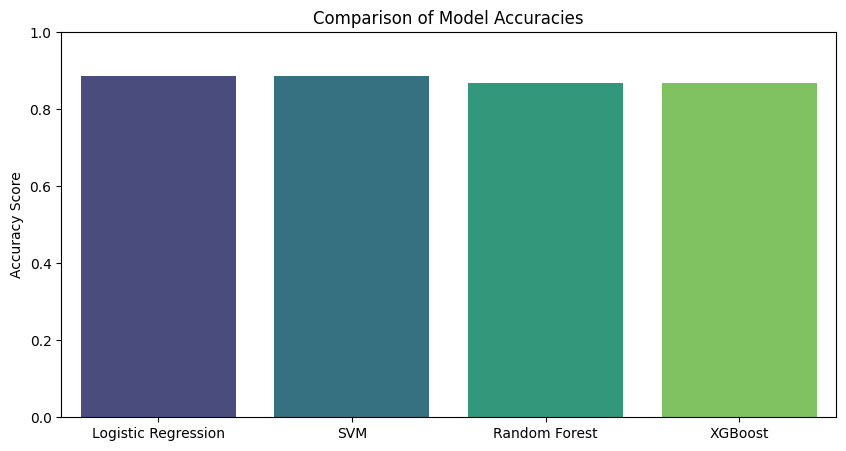

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Dataset Connection (UCI Heart Disease Dataset - Cleveland)
# The dataset is loaded directly from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Loading the data; '?' represents missing values in this dataset
df = pd.read_csv(url, names=columns, na_values="?")

# 2. Data Cleaning & Preprocessing
# Fill missing values with the median of the column
df.fillna(df.median(), inplace=True)

# The target column contains values 0-4.
# We convert it to binary: 0 (No Disease) and 1 (Disease Present)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# 3. Feature Selection and Data Splitting
X = df.drop('target', axis=1)
y = df['target']

# Split data into 80% Training and 20% Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Scaling
# Scaling is crucial for SVM and Logistic Regression performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Model Initialization
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True, kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 6. Training and Evaluation Loop
print("--- Heart Disease Prediction Task Results ---\n")
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate Accuracy
    acc = accuracy_score(y_test, predictions)
    results[name] = acc

    print(f"{name} Accuracy: {acc*100:.2f}%")

# 7. Detailed Analysis of the Best Model (XGBoost)
print("\n--- Detailed Classification Report for XGBoost ---")
best_model_preds = models["XGBoost"].predict(X_test)
print(classification_report(y_test, best_model_preds))

# 8. Visualization of Results
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

In [5]:
pip install gradio

In [6]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# 1. Setup and Model Training (Internal Logic)
# Dataset: UCI Heart Disease (Cleveland)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

# Load data and handle missing values
df = pd.read_csv(url, names=columns, na_values="?")
df.fillna(df.median(), inplace=True)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Split and Scale
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Training the XGBoost model as it usually provides the best results for this task
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

# 2. Prediction Function for Gradio
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Convert categorical inputs to numerical format as expected by the model
    sex = 1.0 if sex == "Male" else 0.0
    fbs = 1.0 if fbs == "Yes (>120 mg/dl)" else 0.0
    exang = 1.0 if exang == "Yes" else 0.0

    # Create an array of the inputs
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    # Apply the same scaling used during training
    input_scaled = scaler.transform(input_data)

    # Get prediction and probability
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    if prediction == 1:
        return f"⚠️ Warning: High Risk of Heart Disease (Confidence: {probability*100:.2f}%)"
    else:
        return f"✅ Low Risk: Heart appears healthy (Confidence: {(1-probability)*100:.2f}%)"

# 3. Gradio UI Layout
interface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Slider(20, 100, step=1, label="Age"),
        gr.Radio(["Male", "Female"], label="Sex"),
        gr.Dropdown([1, 2, 3, 4], label="Chest Pain Type (1-4)"),
        gr.Number(label="Resting Blood Pressure (mm Hg)"),
        gr.Number(label="Cholesterol (mg/dl)"),
        gr.Radio(["No", "Yes (>120 mg/dl)"], label="Fasting Blood Sugar"),
        gr.Dropdown([0, 1, 2], label="Resting ECG Results"),
        gr.Slider(60, 220, step=1, label="Max Heart Rate Achieved"),
        gr.Radio(["No", "Yes"], label="Exercise Induced Angina"),
        gr.Number(label="ST Depression (Oldpeak)"),
        gr.Dropdown([1, 2, 3], label="Slope of Peak Exercise ST Segment"),
        gr.Slider(0, 3, step=1, label="Number of Major Vessels (0-3)"),
        gr.Dropdown([3, 6, 7], label="Thal (3=Normal, 6=Fixed, 7=Reversable)")
    ],
    outputs="text",
    title="Heart Disease Prediction System",
    description="Enter patient clinical data to predict the presence of heart disease using Machine Learning (XGBoost)."
)

# 4. Launch the App
if __name__ == "__main__":
    interface.launch()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:50:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bf662f28d15f188825.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
